In [21]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import StackingClassifier, RandomForestClassifier

In [2]:
import pandas as pd
X_train = pd.read_csv('x_train.csv', header=None)
Y_train = pd.read_csv('y_train.csv', header=None)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=0)

In [24]:
def select_features_chi2(X_train, X_test, Y_train, k_val):
    fs = SelectKBest(score_func=chi2, k=k_val)
    fs.fit(X_train, Y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [25]:
models = [
    ('svm', SVC(random_state=0, C=3.792690190732246,gamma = 0.5689866029018293) ),
    ('mulb', MultinomialNB(alpha=0.0001) )]

level1 = LogisticRegression()
svm_mulb = StackingClassifier(estimators=models, final_estimator=level1, cv=5)
x_train_fs,x_svm_mul, fs = select_features_chi2(x_train, x_test, y_train, k_val=145)
svm_mulb.fit(x_train_fs, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


StackingClassifier(cv=5,
                   estimators=[('svm',
                                SVC(C=3.792690190732246,
                                    gamma=0.5689866029018293, random_state=0)),
                               ('mulb', MultinomialNB(alpha=0.0001))],
                   final_estimator=LogisticRegression())

In [27]:
models = [
    ('lr', LogisticRegression(C=1.438449888287663, max_iter=500) ),
    ('svm', SVC(random_state=0, C=3.792690190732246,gamma = 0.5689866029018293) ), 
    ('mulb', MultinomialNB(alpha=0.0001) ),
    ('rfc', RandomForestClassifier(n_estimators=80, random_state=0, max_depth=37) )]

all_models = StackingClassifier(estimators=models, final_estimator=level1, cv=5)
x_train_fs, x_all_models, fs = select_features_chi2(x_train, x_test, y_train, k_val=150)
all_models.fit(x_train_fs, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


StackingClassifier(cv=5,
                   estimators=[('lr',
                                LogisticRegression(C=1.438449888287663,
                                                   max_iter=500)),
                               ('svm',
                                SVC(C=3.792690190732246,
                                    gamma=0.5689866029018293, random_state=0)),
                               ('mulb', MultinomialNB(alpha=0.0001)),
                               ('rfc',
                                RandomForestClassifier(max_depth=37,
                                                       n_estimators=80,
                                                       random_state=0))],
                   final_estimator=LogisticRegression())

In [28]:
models = [
    ('lr', LogisticRegression(C=1.438449888287663, max_iter=500) ),
    ('svm', SVC(random_state=0, C=3.792690190732246,gamma = 0.5689866029018293) ), 
    ('mulb', MultinomialNB(alpha=0.0001) )]

lr_svm_mulb = StackingClassifier(estimators=models, final_estimator=level1, cv=5)
x_train_fs,x_lr_svm_mulb, fs = select_features_chi2(x_train, x_test, y_train, k_val=155)
lr_svm_mulb.fit(x_train_fs, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


StackingClassifier(cv=5,
                   estimators=[('lr',
                                LogisticRegression(C=1.438449888287663,
                                                   max_iter=500)),
                               ('svm',
                                SVC(C=3.792690190732246,
                                    gamma=0.5689866029018293, random_state=0)),
                               ('mulb', MultinomialNB(alpha=0.0001))],
                   final_estimator=LogisticRegression())

In [29]:
svm_mul_pred = svm_mulb.predict(x_svm_mul)
all_pred = all_models.predict(x_all_models)
lr_svm_mulb_pred = lr_svm_mulb.predict(x_lr_svm_mulb)

In [30]:
def print_metrics(xpred, model):
    print("Stats")
    print(classification_report(y_test, xpred))
    print("Confusion matrix:")
    cm = confusion_matrix(y_test,xpred, labels= model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= model.classes_)
    disp.plot() 

In [11]:
Y_train[0].value_counts()

3.0    131
2.0    131
1.0    131
Name: 0, dtype: int64

Stats
              precision    recall  f1-score   support

         1.0       0.68      0.60      0.64        43
         2.0       0.69      0.72      0.70        43
         3.0       0.94      1.00      0.97        44

    accuracy                           0.78       130
   macro avg       0.77      0.78      0.77       130
weighted avg       0.77      0.78      0.77       130

Confusion matrix:


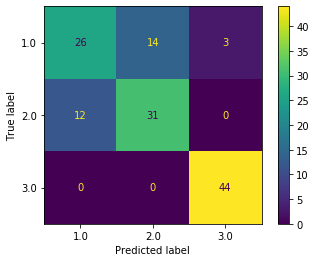

In [31]:
print_metrics(svm_mul_pred, svm_mulb)

Stats
              precision    recall  f1-score   support

         1.0       0.71      0.67      0.69        43
         2.0       0.72      0.72      0.72        43
         3.0       0.96      1.00      0.98        44

    accuracy                           0.80       130
   macro avg       0.79      0.80      0.80       130
weighted avg       0.80      0.80      0.80       130

Confusion matrix:


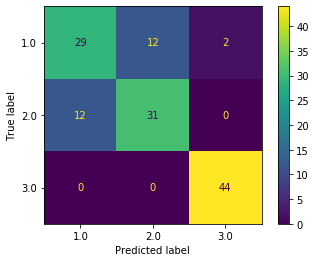

In [32]:
print_metrics(all_pred, all_models)

Stats
              precision    recall  f1-score   support

         1.0       0.70      0.65      0.67        43
         2.0       0.70      0.72      0.71        43
         3.0       0.96      1.00      0.98        44

    accuracy                           0.79       130
   macro avg       0.79      0.79      0.79       130
weighted avg       0.79      0.79      0.79       130

Confusion matrix:


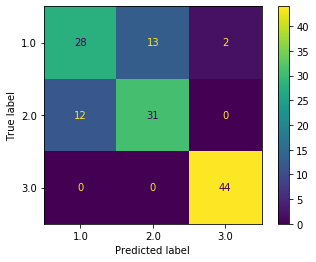

In [33]:
print_metrics(lr_svm_mulb_pred, lr_svm_mulb)

As mentioned in the other notebook, accuracy for class 3 is better than for other 2 classes, the reason of which is because class 3 has the least number of examples, hence when we resampled, we were making a lot of copies of the same instances, which apparently leads to some certain extent of overfitting, but we're good here for this task because we have a very small, unscalable data (there is a limit to the number of dishes anyway). But in general, the models perform really well on all metrics. The balanced dataset has definitely benefited them tremendously. The "full-stack" model appears to perform best, though the difference from other models is not so significant.